| Вариант | Задача 1 | Задача 2 |
|:-------:|:--------:|:--------:|
|       5 |        5 |       25 |

**Группа** ИУ5-21М

**ФИО** Демирев Никита Константинович
***

# Задача 1
Для набора данных проведите кодирование одного (произвольного) категориального признака с использованием метода "one-hot encoding".

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.impute import MissingIndicator
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
%matplotlib inline 
sns.set(style="ticks")

In [2]:
def repair_df(df : pd.DataFrame):
    df['Population (2020)'] = df['Population (2020)'].apply(lambda x: int(''.join(x.split(','))))
    df[' (km2).2'] = df[' (km2).2'].apply(lambda x: float(''.join(x.split(','))))
    df[' (km2).1'] = df[' (km2).1'].apply(lambda x: float(''.join(x.split(','))))
    df[' (km2)'] = df[' (km2)'].apply(lambda x: int(''.join(x.split(','))))
    df['Water area (sq mi)'] = df['Water area (sq mi)'].apply(lambda x: float(''.join(x.split(','))))
    df['Land area (sq mi)'] = df['Land area (sq mi)'].apply(lambda x: float(''.join(x.split(','))))
    df['Total area (sq mi)'] = df['Total area (sq mi)'].apply(lambda x: float(''.join(x.split(','))))
    return df

In [3]:
df = repair_df(pd.read_csv('dataset.csv'))
df.head()
df.rename(columns={
    'Rank': 'Rank',
    'City': 'City',
    'State': 'State',
    'Land area (sq mi)': 'Land area',
    ' (km2)': 'km2',
    'Water area (sq mi)': 'Water area',
    ' (km2).1': 'km2.1',
    'Total area (sq mi)': 'Total area',
    ' (km2).2': 'km2.2',
    'Population (2020)': 'Population'
}, inplace=True)
df.to_csv('new_dataset.csv', index=False)
df.columns

Index(['Rank ', 'City ', 'State ', 'Land area', 'km2', 'Water area', 'km2.1',
       'Total area', 'km2.2', 'Population'],
      dtype='object')

In [4]:
df = pd.read_csv('new_dataset.csv')
print(df.columns)
print()
df.head()

Index(['Rank ', 'City ', 'State ', 'Land area', 'km2', 'Water area', 'km2.1',
       'Total area', 'km2.2', 'Population'],
      dtype='object')



,Rank,City,State,Land area,km2,Water area,km2.1,Total area,km2.2,Population
0,1,Sitka,Alaska,2870.1,7434,1945.1,5038.0,4815.1,12471.0,8458
1,2,Juneau,Alaska,2704.0,7003,550.7,1426.0,3254.7,8430.0,32255
2,3,Wrangell,Alaska,2556.0,6620,920.6,2384.0,3476.6,9004.0,2127
3,4,Anchorage,Alaska,1706.8,4421,239.9,621.0,1946.7,5042.0,291247
4,5,Tribune,Kansas,778.2,2016,0.0,0.0,778.2,2016.0,1182


In [5]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
cat_enc_ohe = ohe.fit_transform(df[['State ']])
cat_enc_ohe

<150x39 sparse matrix of type '<class 'numpy.float64'>'
	with 150 stored elements in Compressed Sparse Row format>

In [6]:
cat_enc_ohe.todense()[0:10]

matrix([[0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       

In [7]:
# Добавление отдельной колонки, признака пустых значений
pd.get_dummies(df[['State ']], dummy_na=True).head()

,State _Alabama,State _Alaska,State _Arizona,State _Arkansas,State _California,State _Colorado,State _Florida,State _Georgia,State _Idaho,State _Illinois,...,State _Pennsylvania,State _South Carolina,State _South Dakota,State _Tennessee,State _Texas,State _Utah,State _Virginia,State _Washington,State _Wisconsin,State _nan
0,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


***
# Задача 2
Для набора данных для одного (произвольного) числового признака проведите обнаружение и удаление выбросов на основе межквартильного размаха.

In [8]:
def diagnostic_plots(df, variable, title):
    fig, ax = plt.subplots(figsize=(10,7))
    # гистограмма
    plt.subplot(2, 2, 1)
    df[variable].hist(bins=30)
    ## Q-Q plot
    plt.subplot(2, 2, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    # ящик с усами
    plt.subplot(2, 2, 3)
    sns.violinplot(x=df[variable])    
    # ящик с усами
    plt.subplot(2, 2, 4)
    sns.boxplot(x=df[variable])  
    fig.suptitle(title)
    plt.show()

C:\Users\hae19\AppData\Local\Temp\ipykernel_26196\223523601.py:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 2, 1)


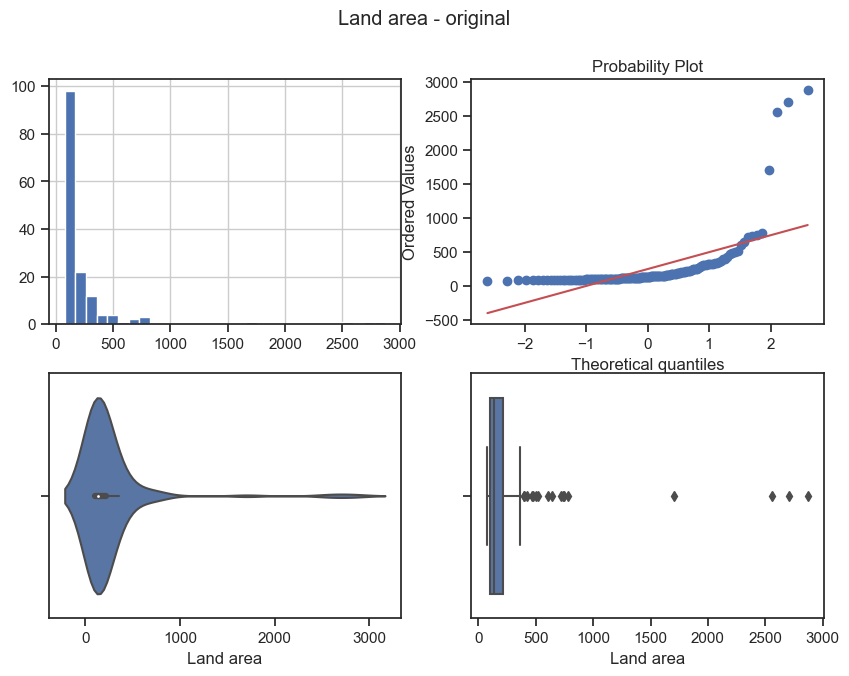

In [9]:
diagnostic_plots(df, 'Land area', 'Land area - original')
# diagnostic_plots(df, 'km2', 'km2 - original')
# diagnostic_plots(df, 'Water area', 'Water area - original')
# diagnostic_plots(df, 'km2.1', 'km2.1 - original')
# diagnostic_plots(df, 'Total area', 'Total area - original')
# diagnostic_plots(df, 'km2.2', 'km2.2 - original')
# diagnostic_plots(df, 'Population', 'Population - original')

In [10]:
# Тип вычисления верхней и нижней границы выбросов
from enum import Enum
class OutlierBoundaryType(Enum):
    SIGMA = 1
    QUANTILE = 2
    IRQ = 3

# Функция вычисления верхней и нижней границы выбросов
def get_outlier_boundaries(df, col, outlier_boundary_type: OutlierBoundaryType):
    if outlier_boundary_type == OutlierBoundaryType.SIGMA:
        K1 = 3
        lower_boundary = df[col].mean() - (K1 * df[col].std())
        upper_boundary = df[col].mean() + (K1 * df[col].std())

    elif outlier_boundary_type == OutlierBoundaryType.QUANTILE:
        lower_boundary = df[col].quantile(0.05)
        upper_boundary = df[col].quantile(0.95)

    elif outlier_boundary_type == OutlierBoundaryType.IRQ:
        K2 = 1.5
        IQR = df[col].quantile(0.75) - df[col].quantile(0.25)
        lower_boundary = df[col].quantile(0.25) - (K2 * IQR)
        upper_boundary = df[col].quantile(0.75) + (K2 * IQR)

    else:
        raise NameError('Unknown Outlier Boundary Type')
        
    return lower_boundary, upper_boundary  

C:\Users\hae19\AppData\Local\Temp\ipykernel_26196\223523601.py:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 2, 1)


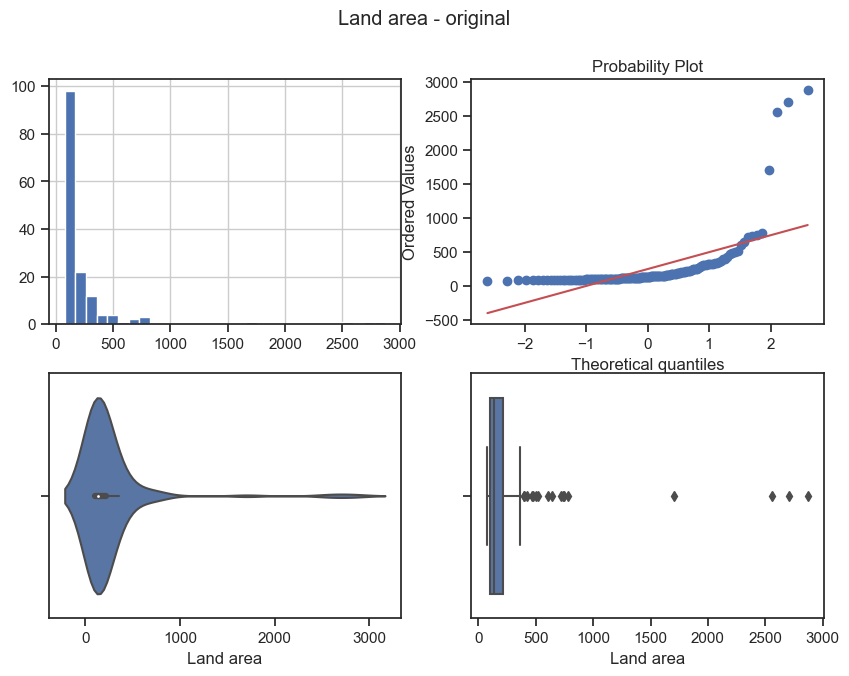

C:\Users\hae19\AppData\Local\Temp\ipykernel_26196\223523601.py:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 2, 1)


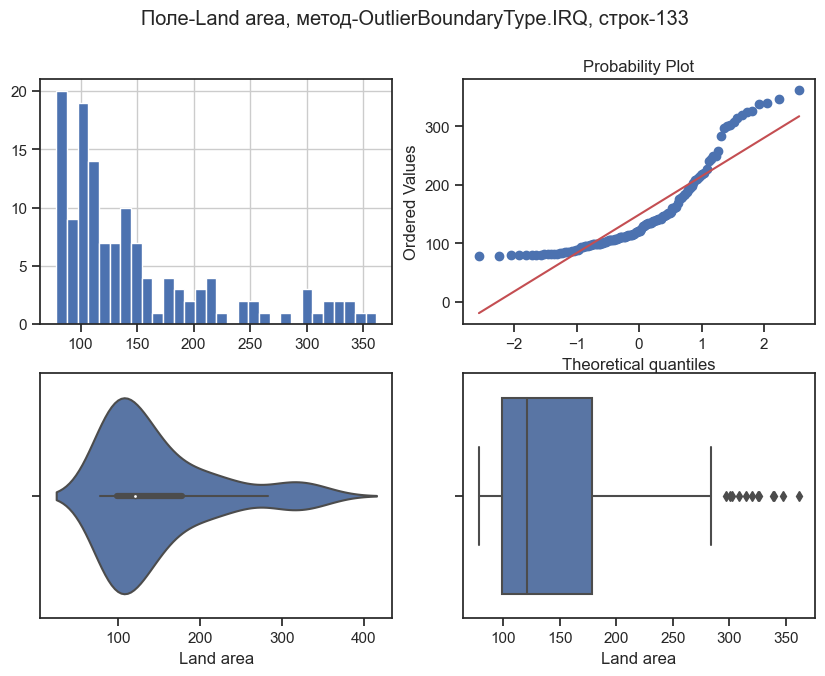

In [11]:
lower_boundary, upper_boundary = get_outlier_boundaries(df, 'Land area', OutlierBoundaryType.IRQ)
# Флаги для удаления выбросов
outliers_temp = np.where(df['Land area'] > upper_boundary, True, 
                            np.where(df['Land area'] < lower_boundary, True, False))
# Удаление данных на основе флага
data_trimmed = df.loc[~(outliers_temp), ]  
title = 'Поле-{}, метод-{}, строк-{}'.format('Land area', OutlierBoundaryType.IRQ, data_trimmed.shape[0])
diagnostic_plots(df, 'Land area', 'Land area - original')
diagnostic_plots(data_trimmed, 'Land area', title)